In [21]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [22]:
path = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb = fits.open(path)
data = tb[1].data 

In [23]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_members_VAC.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7260 GC stars


In [24]:
apo_id = data['APOGEE_ID']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

In [25]:
mask = (data['SNR']>50)&(data['LOGG']<1.5)&(data['LOGG']>0.5)&(data['TEFF']>3500.)&(data['TEFF']<4500.)&\
    (mask_gcs==False)&(mask_gcs2==False)
mask_p = (data['SNR']>50)&(data['LOGG']>1.5)&(data['LOGG']<3.5)&(data['TEFF']>3500.)&(data['TEFF']<6000.)&\
    (mask_gcs==False)&(mask_gcs2==False)
print('There are '+str(len(data[mask]))+' stars in the parent sample')



There are 62956 stars in the parent sample


# Plot the o-Fe plane for GES, Sgr, LMC

In [26]:
loadpath =  '/Users/dhortadarrington/Documents/Projects/accreted-systems/sav/paper/'
mask_sgr = np.load(loadpath+'mask_sgr.npy')
mask_ges = np.load(loadpath+'mask_ges.npy')
mask_higha = np.load(loadpath+'higha_disc_mask.npy')

# Remove the MCs
lmc_ids = np.loadtxt('/Users/dhortadarrington/Documents/Master/data/LMC_ID_final.txt',dtype='str')
smc_ids = np.loadtxt('/Users/dhortadarrington/Documents/Master/data/SMC_ID_final.txt',dtype='str')
print(len(lmc_ids),len(smc_ids))
lmc_id = np.isin(list(data['APOGEE_ID']),list(lmc_ids))
smc_id = np.isin(list(data['APOGEE_ID']),list(smc_ids))


3748 1002


In [27]:
import pwlf

my_pwlf_sgr = pwlf.PiecewiseLinFit(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.2)], data['O_FE'][mask&mask_sgr&(data['FE_H']<-0.2)])
breaks_sgr = my_pwlf_sgr.fit(2)
x_sgr = np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.2)]),np.nanmax(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.2)]), 100)
y_sgr = my_pwlf_sgr.predict(x_sgr)

my_pwlf_ges = pwlf.PiecewiseLinFit(data['FE_H'][mask&mask_ges&(data['FE_H']<-0.6)&(data['O_FE']>-0.2)], data['O_FE'][mask&mask_ges&(data['FE_H']<-0.6)&(data['O_FE']>-0.2)])
breaks_ges = my_pwlf_ges.fit(2)
x_ges = np.linspace(np.nanmin(data['FE_H'][mask&mask_ges&(data['FE_H']<-0.6)&(data['O_FE']>-0.2)]),np.nanmax(data['FE_H'][mask&mask_ges&(data['FE_H']<-0.6)&(data['O_FE']>-0.2)]), 100)
y_ges = my_pwlf_ges.predict(x_ges)

my_pwlf_lmc = pwlf.PiecewiseLinFit(data['FE_H'][mask&lmc_id&(data['FE_H']<-0.4)&(data['O_FE']>-10)], data['O_FE'][mask&lmc_id&(data['FE_H']<-0.4)&(data['O_FE']>-10)])
breaks_lmc = my_pwlf_lmc.fit(2)
x_lmc = np.linspace(np.nanmin(data['FE_H'][mask&lmc_id&(data['FE_H']<-0.4)&(data['O_FE']>-10)]),np.nanmax(data['FE_H'][mask&lmc_id&(data['FE_H']<-0.4)&(data['O_FE']>-10)]), 100)
y_lmc = my_pwlf_lmc.predict(x_lmc)


In [10]:
print(breaks_ges)
print(breaks_sgr)
print(breaks_lmc)

[-2.29879999 -1.19456802 -0.60084999]
[-1.8132     -0.83248726 -0.20008001]
[-2.21070004 -0.89839385 -0.40346   ]


In [11]:
mask_higha = (mask_higha)|(data['FE_H']<-0.95)

In [12]:
from matplotlib.colors import LogNorm

In [13]:
mask_plot = (np.abs(data['FE_H'])<3)&(np.abs(data['O_FE'])<3)&(~np.isnan(data['O_FE']))&(~np.isnan(data['FE_H']))
my_pwlf_higha = pwlf.PiecewiseLinFit(data['FE_H'][mask_p&mask_plot&mask_higha], data['O_FE'][mask_p&mask_plot&mask_higha])
breaks_higha = my_pwlf_higha.fit(2)
x_higha = np.linspace(np.nanmin(data['FE_H'][mask_p&mask_plot&mask_higha]),np.nanmax(data['FE_H'][mask_p&mask_plot&mask_higha]), 100)
y_higha = my_pwlf_higha.predict(x_higha)

In [14]:
breaks_higha

array([-2.46860003, -0.64912852,  0.42381999])

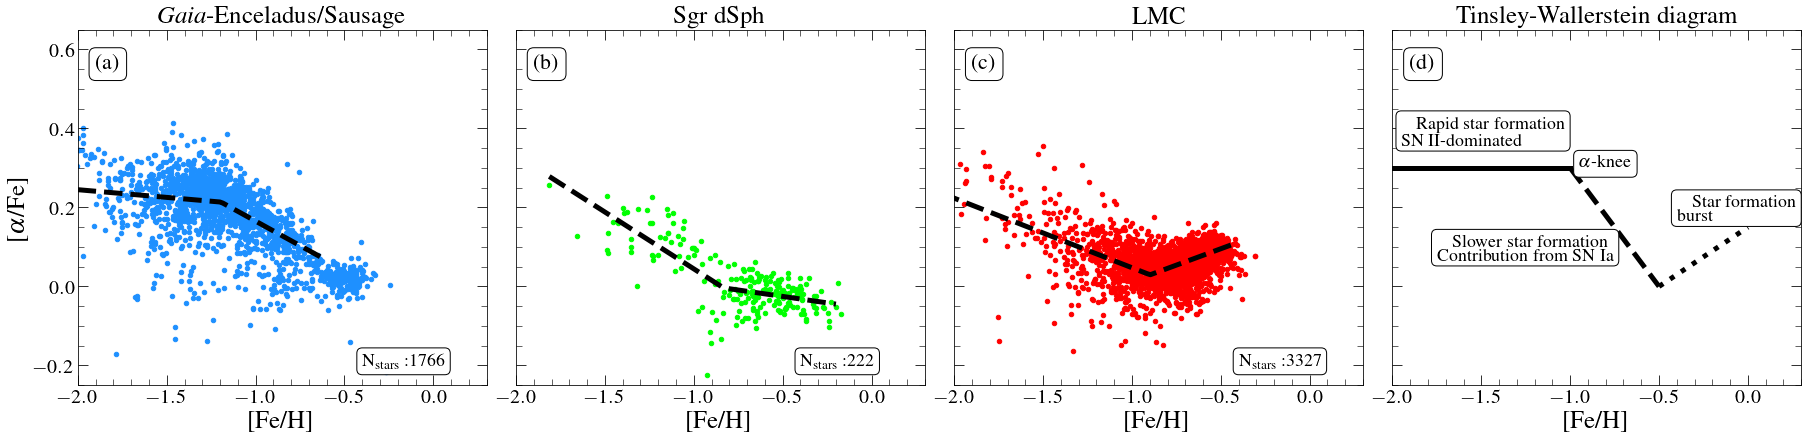

In [13]:
fig = plt.figure(figsize=(25,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(1,4,1)
plt.title('$Gaia$-Enceladus/Sausage', fontsize=25)
color = plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['O_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_ges,y_ges,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'GES [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$1.19',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)])),fontsize=18, bbox=props)
plt.text(-1.9,0.55,r'(a)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)

plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,2)
plt.title('Sgr dSph', fontsize=25)
color = plt.scatter(data['FE_H'][mask&mask_sgr],data['O_FE'][mask&mask_sgr],s=20,c='lime')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_sgr,y_sgr,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'Sgr [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.83',fontsize=18, bbox=props)
plt.text(-1.9,0.55,r'(b)',fontsize=22, bbox=props)
plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_sgr])),fontsize=18, bbox=props)

plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)

# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,3)

plt.title('LMC', fontsize=25)
color = plt.scatter(data['FE_H'][mask&lmc_id],data['O_FE'][mask&lmc_id],s=20,c='r')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_lmc,y_lmc,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&lmc_id])),fontsize=18, bbox=props)
plt.text(-1.9,0.55,r'(c)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.subplot(1,4,3)
# plt.title(r'Milky Way (fit to high-$\alpha$)', fontsize=25)

# mask_plot = (np.abs(data['FE_H'])<3)&(np.abs(data['O_FE'])<3)&(~np.isnan(data['O_FE']))&(~np.isnan(data['FE_H']))
# plt.hist2d(data['FE_H'][mask_p&mask_plot],data['O_FE'][mask_p&mask_plot],bins=200,cmap='binary',norm=LogNorm())
# # plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_higha,y_higha,color='r',lw=5,ls='dashed')
# # plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'MW [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.65',fontsize=18, bbox=props)
# plt.text(-0.8,0.45,r'high-$\alpha$',fontsize=18, bbox=props)
# plt.text(-0.5,0.,r'low-$\alpha$',fontsize=18, bbox=props)
# # plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# # plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# # plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask_p&mask_plot&mask_higha])),fontsize=18, bbox=props)
# plt.text(-1.9,0.55,r'(a)',fontsize=18, bbox=props)
# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()

plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)

plt.subplot(1,4,4)
plt.title('Tinsley-Wallerstein diagram', fontsize=25)
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot([-2,-0.5],[0.3,0.3],color='k',lw=5,)
# plt.plot([-0.5,0.2],[0.3,-0.0],color='k',lw=5,)
# plt.plot([-1.,-0.3],[0.3,0.],color='darkgray',lw=5,ls='dashed')
# plt.plot([-1.5,-0.8],[0.3,0.],color='lightgray',lw=5,ls='dotted')
# plt.text(-0.6,0.35,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-0.5,-0.18,r'high-mass',fontsize=18, bbox=props,c='b')
# plt.text(-1.8,-0.18,r'low-mass',fontsize=18, bbox=props,c='b')
# plt.text(-0.6,-0.15,r'Star formation burst',fontsize=16, bbox=props,color='k')
# plt.arrow(-1.8,-0.1,1.4,0,color='k',lw=2,head_width=0.05,head_length=0.2)
# plt.arrow(-1.8,0.55,1.4,0,color='r',lw=2,head_width=0.05,head_length=0.2)
# plt.text(-1.8,0.45,r'short SFH',fontsize=18, bbox=props,c='r')
# plt.text(-0.5,0.45,r'long SFH',fontsize=18, bbox=props,c='r')

plt.plot([-2,-1],[0.3,0.3],color='k',lw=5,)
plt.plot([-1,-0.5],[0.3,0.],color='k',lw=5,ls='dashed')
plt.plot([-0.5,0],[0.,0.15],color='k',lw=5,ls='dotted')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
plt.text(-0.95,0.3,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
plt.text(-1.95,0.4,r'Rapid star formation\\SN II-dominated ',fontsize=18, bbox=props,color='k')
plt.text(-1.75,0.1,r'Slower star formation\\ Contribution from SN Ia',fontsize=18, bbox=props,color='k')
plt.text(-0.4,0.2,r'Star formation\\burst',fontsize=18, bbox=props,color='k')
plt.text(-1.9,0.55,r'(d)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplots_adjust(hspace=0.0, wspace=0.)


plt.savefig('/Users/dhortadarrington/Documents/Projects/m33-knee/plots/tinsley-gss-proposal.pdf',dpi=600, bbox_inches = 'tight')


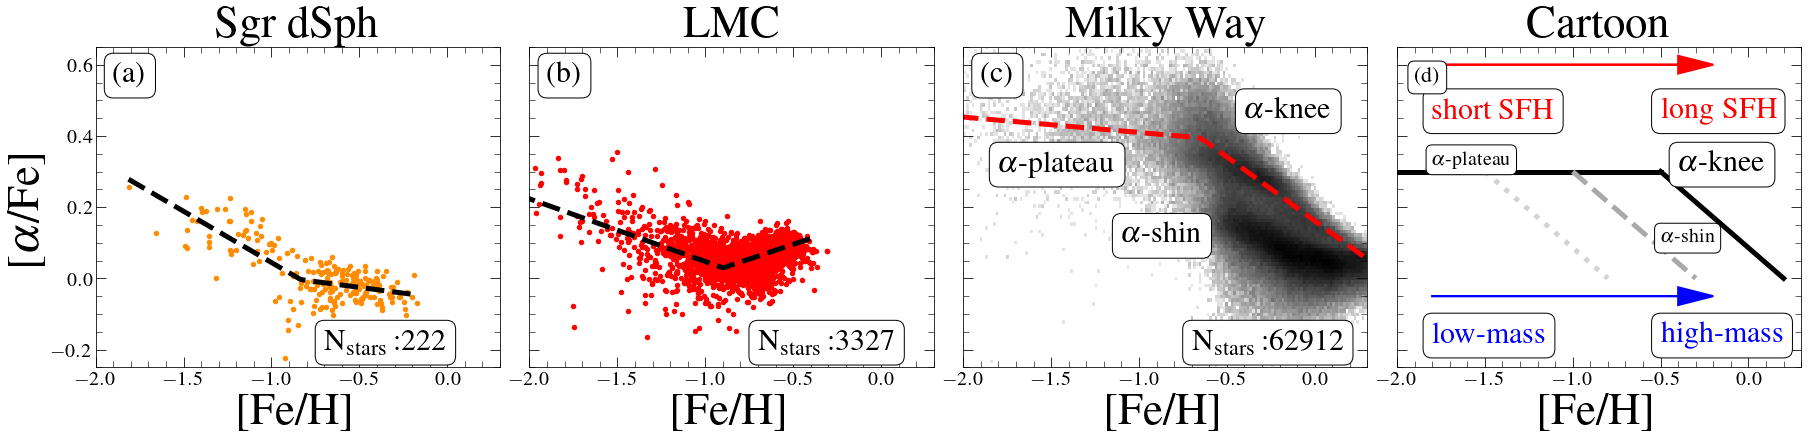

In [20]:
fig = plt.figure(figsize=(25,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(1,4,1)
plt.title('Sgr dSph', fontsize=45)
color = plt.scatter(data['FE_H'][mask&mask_sgr],data['O_FE'][mask&mask_sgr],s=20,c='darkorange')
plt.plot(x_sgr,y_sgr,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'GES [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$1.19',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
plt.text(-0.7,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_sgr])),fontsize=30, bbox=props)
plt.text(-1.9,0.55,r'(a)',fontsize=30, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=45)
plt.xlabel(r'[Fe/H]',fontsize=45)

plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,2)
plt.title('LMC', fontsize=45)
color = plt.scatter(data['FE_H'][mask&lmc_id],data['O_FE'][mask&lmc_id],s=20,c='r')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_lmc,y_lmc,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'Sgr [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.83',fontsize=18, bbox=props)
plt.text(-1.9,0.55,r'(b)',fontsize=30, bbox=props)
plt.text(-0.7,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&lmc_id])),fontsize=30, bbox=props)

plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=45)

# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,3)
plt.title(r'Milky Way', fontsize=45)
mask_plot = (np.abs(data['FE_H'])<3)&(np.abs(data['O_FE'])<3)&(~np.isnan(data['O_FE']))&(~np.isnan(data['FE_H']))
plt.hist2d(data['FE_H'][mask_p&mask_plot],data['O_FE'][mask_p&mask_plot],bins=200,cmap='binary',norm=LogNorm())
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_higha,y_higha,color='r',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
plt.text(-0.7,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_plot])),fontsize=30, bbox=props)
plt.text(-1.9,0.55,r'(c)',fontsize=30, bbox=props)
plt.text(-0.4,0.45,r'$\alpha$-knee',fontsize=30, bbox=props)
plt.text(-1.8,.3,r'$\alpha$-plateau',fontsize=30, bbox=props)
plt.text(-1.1,0.1,r'$\alpha$-shin',fontsize=30, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=45)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.subplot(1,4,3)
# plt.title(r'Milky Way (fit to high-$\alpha$)', fontsize=25)

# mask_plot = (np.abs(data['FE_H'])<3)&(np.abs(data['O_FE'])<3)&(~np.isnan(data['O_FE']))&(~np.isnan(data['FE_H']))
# plt.hist2d(data['FE_H'][mask_p&mask_plot],data['O_FE'][mask_p&mask_plot],bins=200,cmap='binary',norm=LogNorm())
# # plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_higha,y_higha,color='r',lw=5,ls='dashed')
# # plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'MW [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.65',fontsize=18, bbox=props)
# plt.text(-0.8,0.45,r'high-$\alpha$',fontsize=18, bbox=props)
# plt.text(-0.5,0.,r'low-$\alpha$',fontsize=18, bbox=props)
# # plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# # plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# # plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask_p&mask_plot&mask_higha])),fontsize=18, bbox=props)
# plt.text(-1.9,0.55,r'(a)',fontsize=18, bbox=props)
# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()

plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=45)

plt.subplot(1,4,4)
plt.title('Cartoon', fontsize=45)
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot([-2,-0.5],[0.3,0.3],color='k',lw=5,)
plt.plot([-0.5,0.2],[0.3,-0.0],color='k',lw=5,)
plt.plot([-1.,-0.3],[0.3,0.],color='darkgray',lw=5,ls='dashed')
plt.plot([-1.5,-0.8],[0.3,0.],color='lightgray',lw=5,ls='dotted')
plt.text(-0.4,0.3,r'$\alpha$-knee',fontsize=30, bbox=props)
plt.text(-0.5,-0.18,r'high-mass',fontsize=30, bbox=props,c='b')
plt.text(-1.8,-0.18,r'low-mass',fontsize=30, bbox=props,c='b')
# plt.text(-0.6,-0.15,r'Star formation burst',fontsize=16, bbox=props,color='k')
plt.arrow(-1.8,-0.05,1.4,0,color='b',lw=2,head_width=0.05,head_length=0.2)
plt.arrow(-1.8,0.6,1.4,0,color='r',lw=2,head_width=0.05,head_length=0.2)
plt.text(-1.8,0.45,r'short SFH',fontsize=30, bbox=props,c='r')
plt.text(-0.5,0.45,r'long SFH',fontsize=30, bbox=props,c='r')
plt.text(-1.8,.32,r'$\alpha$-plateau',fontsize=20, bbox=props)
plt.text(-0.5,0.1,r'$\alpha$-shin',fontsize=20, bbox=props)

# plt.plot([-2,-1],[0.3,0.3],color='k',lw=5,)
# plt.plot([-1,-0.5],[0.3,0.],color='k',lw=5,ls='dashed')
# plt.plot([-0.5,0],[0.,0.15],color='k',lw=5,ls='dotted')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-0.95,0.3,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-1.95,0.4,r'Rapid star formation\\SN II-dominated ',fontsize=18, bbox=props,color='k')
# plt.text(-1.75,0.1,r'Slower star formation\\ Contribution from SN Ia',fontsize=18, bbox=props,color='k')
# plt.text(-0.4,0.2,r'Star formation\\burst',fontsize=18, bbox=props,color='k')
plt.text(-1.9,0.55,r'(d)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=45)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplots_adjust(hspace=0.0, wspace=0.)


plt.savefig('/Users/dhortadarrington/Documents/Projects/m33-knee/plots/tinsley.pdf',dpi=600, bbox_inches = 'tight')


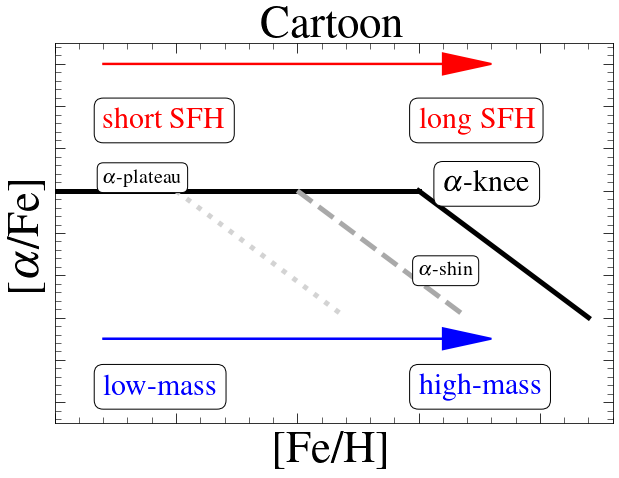

In [31]:
plt.figure(figsize=(10,7), facecolor='white')

plt.title('Cartoon', fontsize=45)
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot([-2,-0.5],[0.3,0.3],color='k',lw=5,)
plt.plot([-0.5,0.2],[0.3,-0.0],color='k',lw=5,)
plt.plot([-1.,-0.3],[0.3,0.],color='darkgray',lw=5,ls='dashed')
plt.plot([-1.5,-0.8],[0.3,0.],color='lightgray',lw=5,ls='dotted')
plt.text(-0.4,0.3,r'$\alpha$-knee',fontsize=30, bbox=props)
plt.text(-0.5,-0.18,r'high-mass',fontsize=30, bbox=props,c='b')
plt.text(-1.8,-0.18,r'low-mass',fontsize=30, bbox=props,c='b')
# plt.text(-0.6,-0.15,r'Star formation burst',fontsize=16, bbox=props,color='k')
plt.arrow(-1.8,-0.05,1.4,0,color='b',lw=2,head_width=0.05,head_length=0.2)
plt.arrow(-1.8,0.6,1.4,0,color='r',lw=2,head_width=0.05,head_length=0.2)
plt.text(-1.8,0.45,r'short SFH',fontsize=30, bbox=props,c='r')
plt.text(-0.5,0.45,r'long SFH',fontsize=30, bbox=props,c='r')
plt.text(-1.8,.32,r'$\alpha$-plateau',fontsize=20, bbox=props)
plt.text(-0.5,0.1,r'$\alpha$-shin',fontsize=20, bbox=props)

# plt.plot([-2,-1],[0.3,0.3],color='k',lw=5,)
# plt.plot([-1,-0.5],[0.3,0.],color='k',lw=5,ls='dashed')
# plt.plot([-0.5,0],[0.,0.15],color='k',lw=5,ls='dotted')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-0.95,0.3,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-1.95,0.4,r'Rapid star formation\\SN II-dominated ',fontsize=18, bbox=props,color='k')
# plt.text(-1.75,0.1,r'Slower star formation\\ Contribution from SN Ia',fontsize=18, bbox=props,color='k')
# plt.text(-0.4,0.2,r'Star formation\\burst',fontsize=18, bbox=props,color='k')
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=45)
plt.xlabel(r'[Fe/H]',fontsize=45)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6, labelleft=False, labelbottom=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

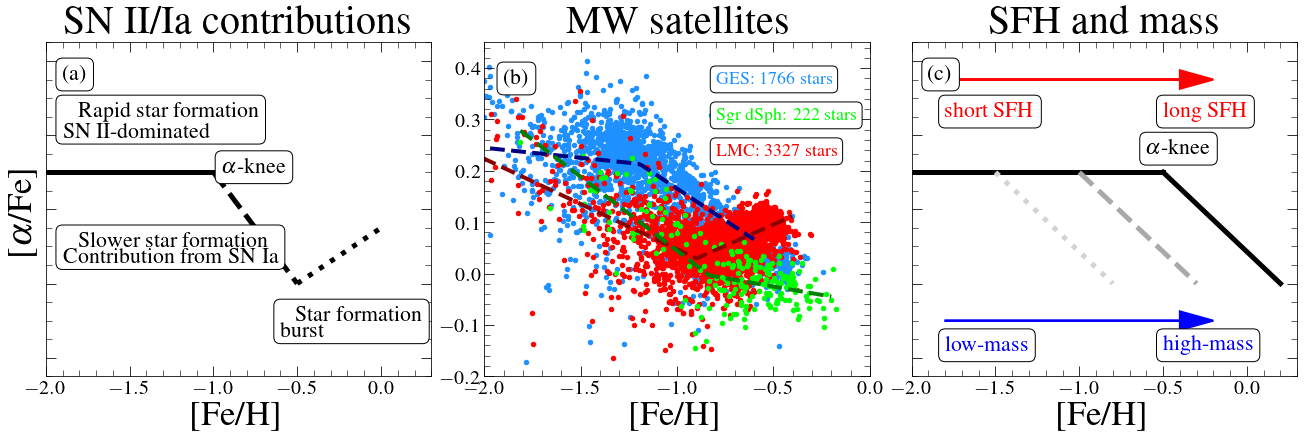

In [15]:
fig = plt.figure(figsize=(18,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')


plt.subplot(1,3,1)
plt.title('SN II/Ia contributions', fontsize=40)

plt.plot([-2,-1],[0.3,0.3],color='k',lw=5,)
plt.plot([-1,-0.5],[0.3,0.],color='k',lw=5,ls='dashed')
plt.plot([-0.5,0],[0.,0.15],color='k',lw=5,ls='dotted')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
plt.text(-0.95,0.3,r'$\alpha$-knee',fontsize=22, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
plt.text(-1.9,0.45,r'Rapid star formation\\SN II-dominated ',fontsize=22, bbox=props,color='k')
plt.text(-1.9,0.1,r'Slower star formation\\ Contribution from SN Ia',fontsize=22, bbox=props,color='k')
plt.text(-0.6,-0.1,r'Star formation\\burst',fontsize=22, bbox=props,color='k')
plt.text(-1.9,0.55,r'(a)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=35)
plt.xlabel(r'[Fe/H]',fontsize=35)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(1,3,2)
plt.title('MW satellites', fontsize=40)
color = plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['O_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
plt.plot(x_ges,y_ges,color='navy',lw=4,ls='dashed')
color = plt.scatter(data['FE_H'][mask&lmc_id],data['O_FE'][mask&lmc_id],s=20,c='r')
plt.plot(x_lmc,y_lmc,color='darkred',lw=4,ls='dashed')
color = plt.scatter(data['FE_H'][mask&mask_sgr],data['O_FE'][mask&mask_sgr],s=20,c='lime')
plt.plot(x_sgr,y_sgr,color='g',lw=4,ls='dashed')
plt.text(-0.8,0.37,r'GES: '+str(len(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)]))+' stars',fontsize=18, bbox=props, color='dodgerblue')
plt.text(-0.8,0.3,r'Sgr dSph: '+str(len(data['FE_H'][mask&mask_sgr]))+' stars',fontsize=18, bbox=props, color='lime')
plt.text(-0.8,0.23,r'LMC: '+str(len(data['FE_H'][mask&lmc_id]))+' stars',fontsize=18, bbox=props, color='r')
plt.text(-1.9,0.37,r'(b)',fontsize=22, bbox=props)
plt.xlim(-2.,0.)
plt.ylim(-0.2,0.45)
plt.xlabel(r'[Fe/H]',fontsize=35)

plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('SFH and mass', fontsize=40)
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot([-2,-0.5],[0.3,0.3],color='k',lw=5,)
plt.plot([-0.5,0.2],[0.3,-0.0],color='k',lw=5,)
plt.plot([-1.,-0.3],[0.3,0.],color='darkgray',lw=5,ls='dashed')
plt.plot([-1.5,-0.8],[0.3,0.],color='lightgray',lw=5,ls='dotted')
plt.text(-0.6,0.35,r'$\alpha$-knee',fontsize=22, bbox=props)
plt.text(-0.5,-0.18,r'high-mass',fontsize=22, bbox=props,c='b')
plt.text(-1.8,-0.18,r'low-mass',fontsize=22, bbox=props,c='b')
# plt.text(-0.6,-0.15,r'Star formation burst',fontsize=16, bbox=props,color='k')
plt.arrow(-1.8,-0.1,1.4,0,color='b',lw=2,head_width=0.05,head_length=0.2)
plt.arrow(-1.8,0.55,1.4,0,color='r',lw=2,head_width=0.05,head_length=0.2)
plt.text(-1.8,0.45,r'short SFH',fontsize=22, bbox=props,c='r')
plt.text(-0.5,0.45,r'long SFH',fontsize=22, bbox=props,c='r')
plt.text(-1.9,0.55,r'(c)',fontsize=22, bbox=props)
plt.xlim(-2.,0.3)
plt.ylim(-0.25,0.65)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=35)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.savefig('/Users/dhortadarrington/Documents/Projects/m33-knee/plots/tinsley_new.pdf',dpi=600, bbox_inches = 'tight')


In [14]:
from matplotlib.colors import LogNorm

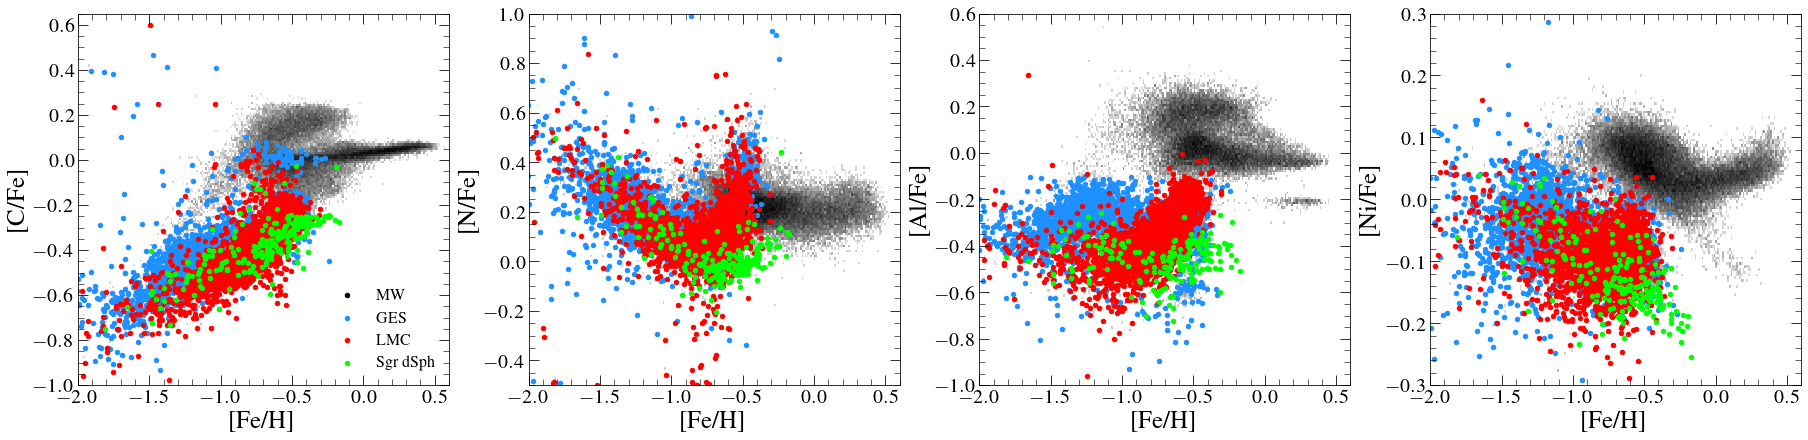

In [15]:
fig = plt.figure(figsize=(25,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(1,4,1)
mask_plot = (data['C_FE']>-10)&(~np.isnan(data['C_FE']))&(data['FE_H']>-10)&(~np.isnan(data['FE_H']))
plt.hist2d(data['FE_H'][mask&mask_plot],data['C_FE'][mask&mask_plot],bins=250,norm=LogNorm(),cmap='binary')
plt.scatter(-4,-2,s=20,c='k',label='MW')
plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['C_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue', label='GES')
plt.scatter(data['FE_H'][mask&lmc_id],data['C_FE'][mask&lmc_id],s=20,c='r',label='LMC')
plt.scatter(data['FE_H'][mask&mask_sgr],data['C_FE'][mask&mask_sgr],s=20,c='lime',label='Sgr dSph')
plt.legend(loc='lower right',fontsize=16,frameon=False)
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_ges,y_ges,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'GES [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$1.19',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)])),fontsize=18, bbox=props)
# plt.text(-1.9,0.45,r'(a)',fontsize=18, bbox=props)
plt.xlim(-2.,0.6)
plt.ylim(-1,0.65)
plt.ylabel(r'[C/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)

plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,2)
mask_plot = (data['N_FE']>-10)&(~np.isnan(data['N_FE']))&(data['FE_H']>-10)&(~np.isnan(data['FE_H']))
plt.hist2d(data['FE_H'][mask&mask_plot],data['N_FE'][mask&mask_plot],bins=250,norm=LogNorm(),cmap='binary')
plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['N_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
plt.scatter(data['FE_H'][mask&lmc_id],data['N_FE'][mask&lmc_id],s=20,c='r')
plt.scatter(data['FE_H'][mask&mask_sgr],data['N_FE'][mask&mask_sgr],s=20,c='lime')
# plt.plot(x_sgr,y_sgr,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'Sgr [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.83',fontsize=18, bbox=props)
# plt.text(-1.9,1.3,r'(b)',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&mask_sgr])),fontsize=18, bbox=props)

plt.xlim(-2.,0.6)
plt.ylim(-0.5,1.)
plt.ylabel(r'[N/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)

# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,4,3)
mask_plot = (data['AL_FE']>-10)&(~np.isnan(data['AL_FE']))&(data['FE_H']>-10)&(~np.isnan(data['FE_H']))
plt.hist2d(data['FE_H'][mask&mask_plot],data['AL_FE'][mask&mask_plot],bins=250,norm=LogNorm(),cmap='binary')
plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['AL_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
plt.scatter(data['FE_H'][mask&lmc_id],data['AL_FE'][mask&lmc_id],s=20,c='r')
plt.scatter(data['FE_H'][mask&mask_sgr],data['AL_FE'][mask&mask_sgr],s=20,c='lime')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_lmc,y_lmc,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask&lmc_id])),fontsize=18, bbox=props)
# plt.text(-1.9,0.8,r'(c)',fontsize=18, bbox=props)
plt.xlim(-2.,0.6)
plt.ylim(-1,0.6)
plt.ylabel(r'[Al/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# plt.subplot(1,4,3)
# plt.title(r'Milky Way (fit to high-$\alpha$)', fontsize=25)

# mask_plot = (np.abs(data['FE_H'])<3)&(np.abs(data['O_FE'])<3)&(~np.isnan(data['O_FE']))&(~np.isnan(data['FE_H']))
# plt.hist2d(data['FE_H'][mask_p&mask_plot],data['O_FE'][mask_p&mask_plot],bins=200,cmap='binary',norm=LogNorm())
# # plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_higha,y_higha,color='r',lw=5,ls='dashed')
# # plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.55,r'MW [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.65',fontsize=18, bbox=props)
# plt.text(-0.8,0.45,r'high-$\alpha$',fontsize=18, bbox=props)
# plt.text(-0.5,0.,r'low-$\alpha$',fontsize=18, bbox=props)
# # plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# # plt.text(-1.2,0.25,r'$\alpha$-knee',fontsize=18, bbox=props)
# # plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-0.4,-0.2,r'N$_{\mathrm{stars}}:$'+str(len(data['FE_H'][mask_p&mask_plot&mask_higha])),fontsize=18, bbox=props)
# plt.text(-1.9,0.55,r'(a)',fontsize=18, bbox=props)
# plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
# plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
# plt.minorticks_on()

plt.subplot(1,4,4)
mask_plot = (data['NI_FE']>-10)&(~np.isnan(data['NI_FE']))&(data['FE_H']>-10)&(~np.isnan(data['FE_H']))
plt.hist2d(data['FE_H'][mask&mask_plot],data['NI_FE'][mask&mask_plot],bins=250,norm=LogNorm(),cmap='binary')
plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],data['NI_FE'][mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
plt.scatter(data['FE_H'][mask&lmc_id],data['NI_FE'][mask&lmc_id],s=20,c='r')
plt.scatter(data['FE_H'][mask&mask_sgr],data['NI_FE'][mask&mask_sgr],s=20,c='lime')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
# plt.text(-1.8,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
# plt.text(-1.15,0.18,r'$\alpha$-knee',fontsize=18, bbox=props)
# plt.text(-1.,0.05,r'$\alpha$-shin',fontsize=18, bbox=props)
# plt.text(-1.95,0.3,r'Rapid star formation\\SN II-dominated ',fontsize=18, bbox=props,color='lime')
# plt.text(-1.5,-0.05,r'Slower star formation\\ Contribution from SN Ia',fontsize=18, bbox=props,color='b')
# plt.text(-0.75,0.2,r'Star formation \\burst',fontsize=18, bbox=props,color='tomato')
# plt.text(-1.9,0.27,r'(d)',fontsize=18, bbox=props)
plt.xlim(-2.,0.6)
plt.ylim(-0.3,0.3)
plt.ylabel(r'[Ni/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplots_adjust(hspace=0.0, wspace=0.)


# plt.savefig('/Users/dhortadarrington/Documents/Projects/m33-knee/plots/other-abun-gss-proposal.pdf',dpi=600, bbox_inches = 'tight')


In [ ]:
fig = plt.figure(figsize=(8,6),constrained_layout=True,facecolor='white')

# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot([-2,-1.],[0.2,0.2],color='lime',lw=5,)
plt.plot([-1.,-0.5],[0.2,-0.0],color='b',lw=5,)
plt.plot([-0.5,-0.2],[0.,0.2],color='tomato',lw=5,)
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1.6,0.45,r'LMC [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.89',fontsize=18, bbox=props)
plt.text(-1.6,0.15,r'$\alpha$-plateau',fontsize=18, bbox=props)
plt.text(-0.95,0.2,r'$\alpha$-knee',fontsize=18, bbox=props)
plt.text(-0.95,0.1,r'$\alpha$-shin',fontsize=18, bbox=props)
plt.text(-1.75,0.25,r'Rapid star formation\\SN II-dominated ',fontsize=18, bbox=props,color='lime')
plt.text(-1.3,0.0,r'Slower star formation\\ Contribution from SN Ia',fontsize=18, bbox=props,color='b')
plt.text(-0.6,0.15,r'Star formation \\burst',fontsize=18, bbox=props,color='tomato')
# plt.text(-1.9,0.45,r'(d)',fontsize=18, bbox=props)
plt.xlim(-2.,-0.)
plt.ylim(-0.2,0.4)
plt.ylabel(r'[$\alpha$/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
cn = data['C_FE']-data['N_FE']

In [ ]:
fig = plt.figure(figsize=(8,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

color = plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)&(data['LOGG']>-10)],cn[mask&mask_ges&(data['AL_FE']<-0.1)&(data['LOGG']>-10)],s=20,c=data['LOGG'][mask&mask_ges&(data['AL_FE']<-0.1)&(data['LOGG']>-10)],cmap=turbo)
plt.scatter(data['FE_H'][mask&mask_sgr&(data['LOGG']>-10)],cn[mask&mask_sgr&(data['LOGG']>-10)],s=20,c=data['LOGG'][mask&mask_sgr&(data['LOGG']>-10)],cmap=turbo,vmin=0,vmax=3,marker='d')
plt.scatter(data['FE_H'][mask&lmc_id&(data['LOGG']>-10)],cn[mask&lmc_id&(data['LOGG']>-10)],s=20,c=data['LOGG'][mask&lmc_id&(data['LOGG']>-10)],cmap=turbo,vmin=0,vmax=3,marker='s')

plt.ylabel(r'[C/N]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.997, 0.12, 0.03,0.82])
cb = plt.colorbar(color, cax = cbar_ax,orientation='vertical')
cb.set_label(label=r'log$g$',fontsize=25)
cb.ax.tick_params(labelsize=20)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


In [ ]:
fig = plt.figure(figsize=(20,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(1,3,1)
plt.title('$Gaia$-Enceladus/Sausage', fontsize=25)
color = plt.scatter(data['FE_H'][mask&mask_ges&(data['AL_FE']<-0.1)],cn[mask&mask_ges&(data['AL_FE']<-0.1)],s=20,c='dodgerblue')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_ges,y_ges,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)

plt.xlim(-2.,-0.2)
plt.ylim(-3,1)
plt.ylabel(r'[C/N]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Sgr dSph', fontsize=25)
color = plt.scatter(data['FE_H'][mask&mask_sgr],cn[mask&mask_sgr],s=20,c='darkorange')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_sgr,y_sgr,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)

plt.xlim(-2.,-0.2)
plt.ylim(-3,1)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# cbar_ax = fig.add_axes([0.902, 0.125, 0.02,0.755])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='vertical')
# cb.set_label(label=r'[N/Fe]',fontsize=25)
# cb.ax.tick_params(labelsize=20)
# cb.ax.xaxis.set_ticks_position('top')
# cb.ax.xaxis.set_label_position('top')

plt.subplot(1,3,3)
plt.title('LMC', fontsize=25)
color = plt.scatter(data['FE_H'][mask&lmc_id],cn[mask&lmc_id],s=20,c='r')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.plot(x_lmc,y_lmc,color='k',lw=5,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)
plt.xlim(-2.,-0.2)
plt.ylim(-3,1)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplots_adjust(hspace=0.0, wspace=0.)


In [ ]:
# for every point, get 200 realisations sampled from a normal distribution centred at X/Fe and with scatter equal to the error
# do this for both Mg/Fe and Fe/H. Then get the median values, and fit the piecewise. Do this 2 times?

# assume an error of 0.05 dex
mask_clean = (data['FE_H']>-10)&(data['O_FE']>-10)
error = 0.1
n = 150

fehs_samp_sgr = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))
mgfe_samp_sgr = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))

for indx, i in enumerate(data['FE_H'][mask&mask_sgr&mask_clean][:n]):
    fehs_samp_sgr[indx] = np.random.normal(i,error,size=200)
    mgfe_samp_sgr[indx] = np.random.normal(data['O_FE'][mask&mask_sgr&mask_clean][:n][indx], error,size=200)

fehs_samp_ges = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))
mgfe_samp_ges = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))

for indx, i in enumerate(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]):
    fehs_samp_ges[indx] = np.random.normal(i,error,size=200)
    mgfe_samp_ges[indx] = np.random.normal(data['O_FE'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n][indx], error,size=200)

    
fehs_samp_lmc = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))
mgfe_samp_lmc = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))

for indx, i in enumerate(data['FE_H'][mask&lmc_id&mask_clean][:n]):
    fehs_samp_lmc[indx] = np.random.normal(i,error,size=200)
    mgfe_samp_lmc[indx] = np.random.normal(data['O_FE'][mask&lmc_id&mask_clean][:n][indx], error,size=200)


In [ ]:
# # for every point, get 200 realisations sampled from a normal distribution centred at X/Fe and with scatter equal to the error
# # do this for both Mg/Fe and Fe/H. Then get the median values, and fit the piecewise. Do this 2 times?

# # assume an error of 0.05 dex
# mask_clean = (data['FE_H']>-10)&(data['O_FE']>-10)
# error = 0.15

# fehs_samp_sgr2 = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))
# mgfe_samp_sgr2 = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&mask_sgr&mask_clean][:n]):
#     fehs_samp_sgr2[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_sgr2[indx] = np.random.normal(data['O_FE'][mask&mask_sgr&mask_clean][:n][indx], error,size=200)

# fehs_samp_ges2 = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))
# mgfe_samp_ges2 = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]):
#     fehs_samp_ges2[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_ges2[indx] = np.random.normal(data['O_FE'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n][indx], error,size=200)

    
# fehs_samp_lmc2 = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))
# mgfe_samp_lmc2 = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&lmc_id&mask_clean][:n]):
#     fehs_samp_lmc2[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_lmc2[indx] = np.random.normal(data['O_FE'][mask&lmc_id&mask_clean][:n][indx], error,size=200)


In [ ]:
# # for every point, get 200 realisations sampled from a normal distribution centred at X/Fe and with scatter equal to the error
# # do this for both Mg/Fe and Fe/H. Then get the median values, and fit the piecewise. Do this 3 times?

# # assume an error of 0.05 dex
# mask_clean = (data['FE_H']>-10)&(data['O_FE']>-10)
# error = 0.15

# fehs_samp_sgr3 = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))
# mgfe_samp_sgr3 = np.zeros((len(data['FE_H'][mask&mask_sgr&mask_clean][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&mask_sgr&mask_clean][:n]):
#     fehs_samp_sgr3[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_sgr3[indx] = np.random.normal(data['O_FE'][mask&mask_sgr&mask_clean][:250][indx], error,size=200)

# fehs_samp_ges3 = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))
# mgfe_samp_ges3 = np.zeros((len(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n]):
#     fehs_samp_ges3[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_ges3[indx] = np.random.normal(data['O_FE'][mask&mask_ges&mask_clean&(data['AL_FE']<-0.1)][:n][indx], error,size=200)

    
# fehs_samp_lmc3 = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))
# mgfe_samp_lmc3 = np.zeros((len(data['FE_H'][mask&lmc_id&mask_clean][:n]),200))

# for indx, i in enumerate(data['FE_H'][mask&lmc_id&mask_clean][:n]):
#     fehs_samp_lmc3[indx] = np.random.normal(i,error,size=200)
#     mgfe_samp_lmc3[indx] = np.random.normal(data['O_FE'][mask&lmc_id&mask_clean][:n][indx], error,size=200)


In [ ]:
median_fehs_sgr = np.median(fehs_samp_sgr,axis=1)
median_mgfe_sgr = np.median(mgfe_samp_sgr,axis=1)

median_fehs_ges = np.median(fehs_samp_ges,axis=1)
median_mgfe_ges = np.median(mgfe_samp_ges,axis=1)

median_fehs_lmc = np.median(fehs_samp_lmc,axis=1)
median_mgfe_lmc = np.median(mgfe_samp_lmc,axis=1)

# median_fehs_sgr2 = np.median(fehs_samp_sgr2,axis=1)
# median_mgfe_sgr2 = np.median(mgfe_samp_sgr2,axis=1)

# median_fehs_ges2 = np.median(fehs_samp_ges2,axis=1)
# median_mgfe_ges2 = np.median(mgfe_samp_ges2,axis=1)

# median_fehs_lmc2 = np.median(fehs_samp_lmc2,axis=1)
# median_mgfe_lmc2 = np.median(mgfe_samp_lmc2,axis=1)

# median_fehs_sgr3 = np.median(fehs_samp_sgr3,axis=1)
# median_mgfe_sgr3 = np.median(mgfe_samp_sgr3,axis=1)

# median_fehs_ges3 = np.median(fehs_samp_ges3,axis=1)
# median_mgfe_ges3 = np.median(mgfe_samp_ges3,axis=1)

# median_fehs_lmc3 = np.median(fehs_samp_lmc3,axis=1)
# median_mgfe_lmc3 = np.median(mgfe_samp_lmc3,axis=1)


In [ ]:
my_pwlf_sgr1 = pwlf.PiecewiseLinFit(median_fehs_sgr, median_mgfe_sgr)
breaks_sgr1 = my_pwlf_sgr1.fit(2)
x_sgr1 = np.linspace(np.nanmin(median_fehs_sgr),np.nanmax(median_fehs_sgr), 100)
y_sgr1 = my_pwlf_sgr1.predict(x_sgr1)

# my_pwlf_sgr2 = pwlf.PiecewiseLinFit(median_fehs_sgr2, median_mgfe_sgr2)
# breaks_sgr2 = my_pwlf_sgr2.fit(2)
# x_sgr2 = np.linspace(np.nanmin(median_fehs_sgr2),np.nanmax(median_fehs_sgr2), 100)
# y_sgr2 = my_pwlf_sgr2.predict(x_sgr2)

# my_pwlf_sgr3 = pwlf.PiecewiseLinFit(median_fehs_sgr3, median_mgfe_sgr3)
# breaks_sgr3 = my_pwlf_sgr3.fit(2)
# x_sgr3 = np.linspace(np.nanmin(median_fehs_sgr3),np.nanmax(median_fehs_sgr3), 100)
# y_sgr3 = my_pwlf_sgr3.predict(x_sgr3)

In [ ]:
my_pwlf_ges1 = pwlf.PiecewiseLinFit(median_fehs_ges, median_mgfe_ges)
breaks_ges1 = my_pwlf_ges1.fit(2)
x_ges1 = np.linspace(np.nanmin(median_fehs_ges),np.nanmax(median_fehs_ges), 100)
y_ges1 = my_pwlf_ges1.predict(x_ges1)

# my_pwlf_ges2 = pwlf.PiecewiseLinFit(median_fehs_ges2, median_mgfe_ges2)
# breaks_ges2 = my_pwlf_ges2.fit(2)
# x_ges2 = np.linspace(np.nanmin(median_fehs_ges2),np.nanmax(median_fehs_ges2), 100)
# y_ges2 = my_pwlf_ges2.predict(x_ges2)

# my_pwlf_ges3 = pwlf.PiecewiseLinFit(median_fehs_ges3, median_mgfe_ges3)
# breaks_ges3 = my_pwlf_ges3.fit(2)
# x_ges3 = np.linspace(np.nanmin(median_fehs_ges3),np.nanmax(median_fehs_ges3), 100)
# y_ges3 = my_pwlf_ges3.predict(x_ges3)

In [ ]:
my_pwlf_lmc1 = pwlf.PiecewiseLinFit(median_fehs_lmc, median_mgfe_lmc)
breaks_lmc1 = my_pwlf_lmc1.fit(2)
x_lmc1 = np.linspace(np.nanmin(median_fehs_lmc),np.nanmax(median_fehs_lmc), 100)
y_lmc1 = my_pwlf_lmc1.predict(x_lmc1)

# my_pwlf_lmc2 = pwlf.PiecewiseLinFit(median_fehs_lmc2, median_mgfe_lmc2)
# breaks_lmc2 = my_pwlf_lmc2.fit(2)
# x_lmc2 = np.linspace(np.nanmin(median_fehs_lmc2),np.nanmax(median_fehs_lmc2), 100)
# y_lmc2 = my_pwlf_lmc2.predict(x_lmc2)

# my_pwlf_lmc3 = pwlf.PiecewiseLinFit(median_fehs_lmc3, median_mgfe_lmc3)
# breaks_lmc3 = my_pwlf_lmc3.fit(2)
# x_lmc3 = np.linspace(np.nanmin(median_fehs_lmc3),np.nanmax(median_fehs_lmc3), 100)
# y_lmc3 = my_pwlf_lmc3.predict(x_lmc3)

In [ ]:
print(breaks_ges1)
print(breaks_sgr1)
print(breaks_lmc1)

In [ ]:
fig = plt.figure(figsize=(20,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(1,3,1)
plt.title('$Gaia$-Enceladus/Sausage', fontsize=25)
plt.scatter(median_fehs_ges,median_mgfe_ges,s=10,c='dodgerblue')
plt.plot(x_ges1,y_ges1,c='b',lw=3,ls='dashed')
plt.text(-1.8,0.45,r'GES simulated [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$1.2',fontsize=18, bbox=props)
# plt.scatter(median_fehs_ges2,median_mgfe_ges2,s=10,c='tomato')
# plt.plot(x_ges2,y_ges2,c='r',lw=3,ls='dashed')
# plt.scatter(median_fehs_ges3,median_mgfe_ges3,s=10,c='lime')
# plt.plot(x_ges3,y_ges3,c='g',lw=3,ls='dashed')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)
plt.text(-1.6,-0.2,r'N$_{\mathrm{stars}}:$150',fontsize=18, bbox=props)

plt.xlim(-2.,-0.2)
plt.ylim(-0.25,0.55)
plt.ylabel(r'[O/Fe]$_{\mathrm{sim}}$',fontsize=25)
plt.xlabel(r'[Fe/H]$_{\mathrm{sim}}$',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Sgr dSph', fontsize=25)
plt.scatter(median_fehs_sgr,median_mgfe_sgr,s=10,c='darkorange')
plt.plot(x_sgr1,y_sgr1,c='darkorange',lw=3,ls='dashed')
plt.text(-1.8,0.45,r'Sgr simulated [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.85',fontsize=18, bbox=props)
# plt.scatter(median_fehs_sgr2,median_mgfe_sgr2,s=10,c='tomato')
# plt.plot(x_sgr2,y_sgr2,c='r',lw=3,ls='dashed')
# plt.scatter(median_fehs_sgr3,median_mgfe_sgr3,s=10,c='lime')
# plt.plot(x_sgr3,y_sgr3,c='g',lw=3,ls='dashed')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)
plt.text(-1.6,-0.2,r'N$_{\mathrm{stars}}:$150',fontsize=18, bbox=props)

plt.xlim(-2.,-0.2)
plt.ylim(-0.25,0.55)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]$_{\mathrm{sim}}$',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

# cbar_ax = fig.add_axes([0.902, 0.125, 0.02,0.755])
# cb = plt.colorbar(color, cax = cbar_ax,orientation='vertical')
# cb.set_label(label=r'[N/Fe]',fontsize=25)
# cb.ax.tick_params(labelsize=20)
# cb.ax.xaxis.set_ticks_position('top')
# cb.ax.xaxis.set_label_position('top')

plt.subplot(1,3,3)
plt.title('LMC', fontsize=25)
plt.scatter(median_fehs_lmc,median_mgfe_lmc,s=10,c='r')
plt.plot(x_lmc1,y_lmc1,c='r',lw=3,ls='dashed')
plt.text(-1.8,0.45,r'LMC simulated [Fe/H]$_{\alpha-\mathrm{Fe, knee}}$: $-$0.8',fontsize=18, bbox=props)
# plt.scatter(median_fehs_lmc2,median_mgfe_lmc2,s=10,c='tomato')
# plt.plot(x_lmc2,y_lmc2,c='r',lw=3,ls='dashed')
# plt.scatter(median_fehs_lmc3,median_mgfe_lmc3,s=10,c='lime')
# plt.plot(x_lmc3,y_lmc3,c='g',lw=3,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
# plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)
plt.xlim(-2.,-0.2)
plt.ylim(-0.25,0.55)
# plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]$_{\mathrm{sim}}$',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6,labelleft=False)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()
plt.text(-1.6,-0.2,r'N$_{\mathrm{stars}}:$150',fontsize=18, bbox=props)

plt.subplots_adjust(hspace=0.0, wspace=0.)


In [76]:
bits_wanted = 2**20
dwarfsIndx_confirmed = (np.bitwise_and(data['APOGEE2_TARGET1'], bits_wanted) != 0)
# can also do dwarfsIndx_confirmed = (data[‘APOGEE2_TARGET1’] & 2L**20 != 0)
sculptor_ids = (dwarfsIndx_confirmed& (data['FIELD']=='SCULPTOR'))
loadpath =  '/Users/dhortadarrington/Documents/Projects/accreted-systems/sav/paper/'
mask_sgr = np.load(loadpath+'mask_sgr.npy')

print(len(data[mask&sculptor_ids]))
print(len(data[mask&mask_sgr]))

58
222


In [77]:
def running_median(xs,ys,bins):
    medians = []
    sigmas = []
    bins = np.linspace(np.nanmin(xs),np.nanmax(xs),bins)
    binsize = (bins[1]-bins[0])/2    
    for indx, i in enumerate(bins):
        medians.append(np.nanmedian(ys[(xs>i)&(xs<i+binsize)]))
        sigmas.append(np.nanstd(ys[(xs>i)&(xs<i+binsize)]))
    medians = np.array(medians)
    sigmas = np.array(sigmas)
    return medians, sigmas,bins

In [78]:
medians_sgr, sigmas_sgr,bins_sgr = running_median(data['FE_H'][mask&mask_sgr],data['MG_FE'][mask&mask_sgr],6)


In [79]:
import pwlf

my_pwlf_sgr = pwlf.PiecewiseLinFit(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.8)], data['O_FE'][mask&mask_sgr&(data['FE_H']<-0.8)])
breaks_sgr = my_pwlf_sgr.fit(2)
x_sgr = np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.8)]),np.nanmax(data['FE_H'][mask&mask_sgr&(data['FE_H']<-0.8)]), 100)
y_sgr = my_pwlf_sgr.predict(x_sgr)


In [80]:
my_pwlf_sculptor = pwlf.PiecewiseLinFit(data['FE_H'][mask&sculptor_ids&(data['FE_H']<-1.2)&(data['FE_H']>-2.1)], data['O_FE'][mask&sculptor_ids&(data['FE_H']<-1.2)&(data['FE_H']>-2.1)])
breaks_sculptor = my_pwlf_sculptor.fit(2)
x_sculptor = np.linspace(np.nanmin(data['FE_H'][mask&sculptor_ids&(data['FE_H']<-1.2)&(data['FE_H']>-2.1)]),np.nanmax(data['FE_H'][mask&sculptor_ids&(data['FE_H']<-1.2)&(data['FE_H']>-2.1)]), 100)
y_sculptor = my_pwlf_sculptor.predict(x_sculptor)


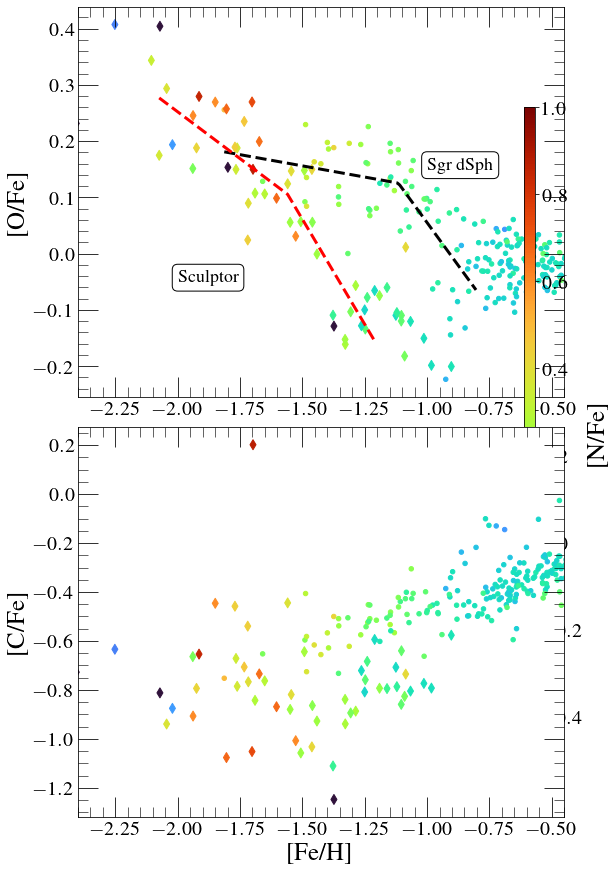

In [81]:
fig = plt.figure(figsize=(8,12),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')

plt.subplot(2,1,1)
color = plt.scatter(data['FE_H'][mask&mask_sgr],data['O_FE'][mask&mask_sgr],s=20,c=data['N_FE'][mask&mask_sgr],cmap=turbo,vmin=-0.5,vmax=1.,label='Sgr dSph')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
plt.plot(x_sgr,y_sgr,color='k',lw=3,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)

plt.scatter(data['FE_H'][mask&sculptor_ids],data['O_FE'][mask&sculptor_ids],s=50,marker='d',c=data['N_FE'][mask&sculptor_ids],cmap=turbo,vmin=-0.5,vmax=1.,label='Sculptor')
plt.plot(x_sculptor,y_sculptor,color='r',lw=3,ls='dashed')
plt.text(-2,-0.05,'Sculptor ',fontsize=18, bbox=props)

plt.xlim(-2.4,-0.45)
# plt.ylim(-0.35,0.4)
plt.ylabel(r'[O/Fe]',fontsize=25)
# plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=20)
plt.tick_params(which='minor', length=10, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.902, 0.125, 0.02,0.755])
cb = plt.colorbar(color, cax = cbar_ax,orientation='vertical')
cb.set_label(label=r'[N/Fe]',fontsize=25)
cb.ax.tick_params(labelsize=20)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.subplot(2,1,2)
plt.scatter(data['FE_H'][mask&mask_sgr],data['C_FE'][mask&mask_sgr],s=20,c=data['N_FE'][mask&mask_sgr],cmap=turbo,vmin=-0.5,vmax=1.,label='Sgr dSph')
# plt.plot(np.linspace(np.nanmin(data['FE_H'][mask&mask_sgr]),np.nanmax(data['FE_H'][mask&mask_sgr]),4),medians_sgr,color='k',lw=3,ls='dashed')
# plt.fill_between(x_sgr,y_sgr-np.nanstd(data['MG_FE'][mask&mask_sgr]),y_sgr+np.nanstd(data['MG_FE'][mask&mask_sgr]),color='orange',alpha=0.2)
plt.scatter(data['FE_H'][mask&sculptor_ids],data['C_FE'][mask&sculptor_ids],s=50,marker='d',c=data['N_FE'][mask&sculptor_ids],cmap=turbo,vmin=-0.5,vmax=1.,label='Sgr dSph')

# plt.scatter(data['FE_H'][mask&sculptor_ids])
plt.xlim(-2.4,-0.45)
# plt.ylim(-0.8,-0.05)
plt.ylabel(r'[C/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=20)
plt.tick_params(which='minor', length=10, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplots_adjust(hspace=0.0, wspace=0.)



# Check that, even with the typical uncertainties delivered by JWST, that we will be able to determine knees

In [234]:
# for every point, get 200 realisations sampled from a normal distribution centred at X/Fe and with scatter equal to the error
# do this for both Mg/Fe and Fe/H. Then get the median values, and fit the piecewise. Do this 3 times?

# assume an error of 0.05 dex

fehs_samp_sgr = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))
mgfe_samp_sgr = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))

for indx, i in enumerate(data['FE_H'][mask&mask_sgr]):
    fehs_samp_sgr[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sgr[indx] = np.random.normal(data['O_FE'][mask&mask_sgr][indx], 0.2,size=200)

fehs_samp_sculptor = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))
mgfe_samp_sculptor = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))

for indx, i in enumerate(data['FE_H'][mask&sculptor_ids]):
    fehs_samp_sculptor[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sculptor[indx] = np.random.normal(data['O_FE'][mask&sculptor_ids][indx], 0.2,size=200)


In [235]:

fehs_samp_sgr2 = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))
mgfe_samp_sgr2 = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))

for indx, i in enumerate(data['FE_H'][mask&mask_sgr]):
    fehs_samp_sgr2[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sgr2[indx] = np.random.normal(data['O_FE'][mask&mask_sgr][indx], 0.2,size=200)

fehs_samp_sculptor2 = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))
mgfe_samp_sculptor2 = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))

for indx, i in enumerate(data['FE_H'][mask&sculptor_ids]):
    fehs_samp_sculptor2[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sculptor2[indx] = np.random.normal(data['O_FE'][mask&sculptor_ids][indx], 0.2,size=200)


In [236]:

fehs_samp_sgr3 = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))
mgfe_samp_sgr3 = np.zeros((len(data['FE_H'][mask&mask_sgr]),200))

for indx, i in enumerate(data['FE_H'][mask&mask_sgr]):
    fehs_samp_sgr3[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sgr3[indx] = np.random.normal(data['O_FE'][mask&mask_sgr][indx], 0.2,size=200)

fehs_samp_sculptor3 = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))
mgfe_samp_sculptor3 = np.zeros((len(data['FE_H'][mask&sculptor_ids]),200))

for indx, i in enumerate(data['FE_H'][mask&sculptor_ids]):
    fehs_samp_sculptor3[indx] = np.random.normal(i,0.1,size=200)
    mgfe_samp_sculptor3[indx] = np.random.normal(data['O_FE'][mask&sculptor_ids][indx], 0.2,size=200)


In [237]:
median_fehs_sgr = np.median(fehs_samp_sgr,axis=1)
median_mgfe_sgr = np.median(mgfe_samp_sgr,axis=1)

median_fehs_sculptor = np.median(fehs_samp_sculptor,axis=1)
median_mgfe_sculptor = np.median(mgfe_samp_sculptor,axis=1)

median_fehs_sgr2 = np.median(fehs_samp_sgr2,axis=1)
median_mgfe_sgr2 = np.median(mgfe_samp_sgr2,axis=1)

median_fehs_sculptor2 = np.median(fehs_samp_sculptor2,axis=1)
median_mgfe_sculptor2 = np.median(mgfe_samp_sculptor2,axis=1)

median_fehs_sgr3 = np.median(fehs_samp_sgr3,axis=1)
median_mgfe_sgr3 = np.median(mgfe_samp_sgr3,axis=1)

median_fehs_sculptor3 = np.median(fehs_samp_sculptor3,axis=1)
median_mgfe_sculptor3 = np.median(mgfe_samp_sculptor3,axis=1)


In [238]:
my_pwlf_sgr1 = pwlf.PiecewiseLinFit(median_fehs_sgr[(median_fehs_sgr<-0.7)&(median_fehs_sgr>-1.5)], median_mgfe_sgr[(median_fehs_sgr<-0.7)&(median_fehs_sgr>-1.5)])
breaks_sgr1 = my_pwlf_sgr1.fit(2)
x_sgr1 = np.linspace(np.nanmin(median_fehs_sgr[(median_fehs_sgr<-0.7)&(median_fehs_sgr>-1.5)]),np.nanmax(median_fehs_sgr[(median_fehs_sgr<-0.7)&(median_fehs_sgr>-1.)]), 100)
y_sgr1 = my_pwlf_sgr1.predict(x_sgr1)

my_pwlf_sgr2 = pwlf.PiecewiseLinFit(median_fehs_sgr2[(median_fehs_sgr2<-0.7)&(median_fehs_sgr2>-1.5)], median_mgfe_sgr2[(median_fehs_sgr2<-0.7)&(median_fehs_sgr2>-1.5)])
breaks_sgr2 = my_pwlf_sgr2.fit(2)
x_sgr2 = np.linspace(np.nanmin(median_fehs_sgr2[(median_fehs_sgr2<-0.7)&(median_fehs_sgr2>-1.5)]),np.nanmax(median_fehs_sgr2[(median_fehs_sgr2<-0.7)&(median_fehs_sgr2>-1.)]), 100)
y_sgr2 = my_pwlf_sgr2.predict(x_sgr2)

my_pwlf_sgr3 = pwlf.PiecewiseLinFit(median_fehs_sgr3[(median_fehs_sgr3<-0.7)&(median_fehs_sgr3>-1.5)], median_mgfe_sgr3[(median_fehs_sgr3<-0.7)&(median_fehs_sgr3>-1.5)])
breaks_sgr3 = my_pwlf_sgr3.fit(2)
x_sgr3 = np.linspace(np.nanmin(median_fehs_sgr3[(median_fehs_sgr3<-0.7)&(median_fehs_sgr3>-1.5)]),np.nanmax(median_fehs_sgr3[(median_fehs_sgr3<-0.7)&(median_fehs_sgr3>-1.)]), 100)
y_sgr3 = my_pwlf_sgr3.predict(x_sgr3)


In [239]:
my_pwlf_sculptor1 = pwlf.PiecewiseLinFit(median_fehs_sculptor, median_mgfe_sculptor)
breaks_sculptor1 = my_pwlf_sculptor1.fit(2)
x_sculptor1 = np.linspace(np.nanmin(median_fehs_sculptor[(median_fehs_sculptor<-1.)&(median_fehs_sculptor>-2.1)]),np.nanmax(median_fehs_sculptor[(median_fehs_sculptor<-1.)&(median_fehs_sculptor>-2.1)]), 100)
y_sculptor1 = my_pwlf_sculptor1.predict(x_sculptor1)

my_pwlf_sculptor2 = pwlf.PiecewiseLinFit(median_fehs_sculptor2, median_mgfe_sculptor2)
breaks_sculptor2 = my_pwlf_sculptor2.fit(2)
x_sculptor2 = np.linspace(np.nanmin(median_fehs_sculptor2[(median_fehs_sculptor2<-1.)&(median_fehs_sculptor2>-2.1)]),np.nanmax(median_fehs_sculptor2[(median_fehs_sculptor2<-1.)&(median_fehs_sculptor2>-2.1)]), 100)
y_sculptor2 = my_pwlf_sculptor2.predict(x_sculptor2)

my_pwlf_sculptor3 = pwlf.PiecewiseLinFit(median_fehs_sculptor3, median_mgfe_sculptor3)
breaks_sculptor3 = my_pwlf_sculptor3.fit(2)
x_sculptor3 = np.linspace(np.nanmin(median_fehs_sculptor3[(median_fehs_sculptor3<-1.)&(median_fehs_sculptor3>-2.1)]),np.nanmax(median_fehs_sculptor3[(median_fehs_sculptor3<-1.)&(median_fehs_sculptor3>-2.1)]), 100)
y_sculptor3 = my_pwlf_sculptor3.predict(x_sculptor3)


<ErrorbarContainer object of 3 artists>

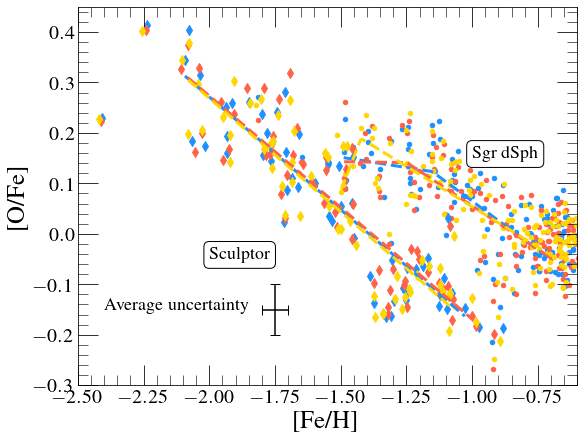

In [240]:
fig = plt.figure(figsize=(8,6),constrained_layout=True,facecolor='white')

props = dict(boxstyle='round', facecolor='white')
plt.scatter(median_fehs_sgr,median_mgfe_sgr,s=20,c='dodgerblue')
plt.plot(x_sgr1,y_sgr1,color='dodgerblue',lw=3,ls='dashed')
plt.scatter(median_fehs_sgr2,median_mgfe_sgr2,s=20,c='tomato')
plt.plot(x_sgr2,y_sgr2,color='tomato',lw=3,ls='dashed')
plt.scatter(median_fehs_sgr3,median_mgfe_sgr3,s=20,c='gold')
plt.plot(x_sgr3,y_sgr3,color='gold',lw=3,ls='dashed')
plt.text(-2,-0.05,'Sculptor ',fontsize=18, bbox=props)
plt.text(-1,0.15,'Sgr dSph',fontsize=18, bbox=props)

plt.scatter(median_fehs_sculptor,median_mgfe_sculptor,s=50,marker='d',c='dodgerblue')
plt.plot(x_sculptor1,y_sculptor1,color='dodgerblue',lw=3,ls='dashed')
plt.scatter(median_fehs_sculptor2,median_mgfe_sculptor2,s=50,marker='d',c='tomato')
plt.plot(x_sculptor2,y_sculptor2,color='tomato',lw=3,ls='dashed')
plt.scatter(median_fehs_sculptor3,median_mgfe_sculptor3,s=50,marker='d',c='gold')
plt.plot(x_sculptor3,y_sculptor3,color='gold',lw=3,ls='dashed')

plt.xlim(-2.5,-0.6)
plt.ylim(-0.3,0.45)
plt.ylabel(r'[O/Fe]',fontsize=25)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=20)
plt.tick_params(which='minor', length=10, direction='in',top=True,right=True)
plt.minorticks_on()

plt.text(-2.4,-0.15,'Average uncertainty',fontsize=18)
plt.errorbar(-1.75,-0.15,xerr=0.05,yerr=0.05,ecolor='k',capsize=5)



In [ ]:
plt.hist(data['FE_H'][mask&mask_sgr]/median_fehs_sgr)


In [89]:
len(data['FE_H'][mask&mask_sgr])

222

# Check that we can recover a knee with 70 stars

In [221]:
n = 200
fehs_samp_ges_sub = np.zeros((n, 70))
mgfe_samp_ges_sub = np.zeros((n, 70))

for indx, i in tqdm.tqdm_notebook(enumerate(range(n))):
    fehs_samp_ges_sub[indx] = np.random.choice(data['FE_H'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)&(np.abs(data['MG_FE'])<0.5)], 70, replace=False)
    mgfe_samp_ges_sub[indx] = np.random.choice(data['MG_FE'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)&(np.abs(data['MG_FE'])<0.5)], 70, replace=False)


0it [00:00, ?it/s]

In [222]:
fehs_samp_ges_sub.shape

(200, 70)

In [223]:
# fehs_samp_ges_sub = np.random.choice(data['FE_H'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)], 70, replace=False)
# mgfe_samp_ges_sub = np.random.choice(data['MG_FE'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)], 70, replace=False)

fehs_samp_ges = data['FE_H'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)&(np.abs(data['MG_FE'])<0.4)]
mgfe_samp_ges = data['MG_FE'][mask&lmc_id&(data['FE_H']>-1.6)&(data['FE_H']<-0.6)&(np.abs(data['MG_FE'])<0.4)]


In [224]:
# my_pwlf_ges1 = pwlf.PiecewiseLinFit(fehs_samp_ges_sub, mgfe_samp_ges_sub)
# breaks_ges1 = my_pwlf_ges1.fit(2)
# x_ges1 = np.linspace(np.nanmin(fehs_samp_ges_sub),np.nanmax(fehs_samp_ges_sub), 100)
# y_ges1 = my_pwlf_ges1.predict(x_ges1)

breaks_ges1 = []

for indx, i in enumerate(fehs_samp_ges_sub):

    my_pwlf_ges1 = pwlf.PiecewiseLinFit(i, mgfe_samp_ges_sub[indx])
    res = my_pwlf_ges1.fit(2)
    breaks_ges1.append(res[1])
# x_ges1 = np.linspace(np.nanmin(fehs_samp_ges_sub),np.nanmax(fehs_samp_ges_sub), 100)
# y_ges1 = my_pwlf_ges1.predict(x_ges1)




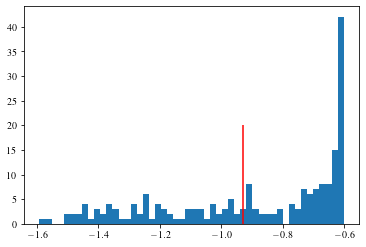

In [225]:
plt.hist(breaks_ges1, 50)
plt.vlines(breaks_ges[1], 0., 20, color='red')

In [226]:
np.mean(breaks_ges1), np.median(breaks_ges1)

(-0.8988632529236843, -0.7876399784335535)

In [212]:
my_pwlf_ges = pwlf.PiecewiseLinFit(fehs_samp_ges, mgfe_samp_ges)
breaks_ges = my_pwlf_ges.fit(2)
x_ges = np.linspace(np.nanmin(fehs_samp_ges),np.nanmax(fehs_samp_ges), 100)
y_ges = my_pwlf_ges.predict(x_ges)




In [213]:
breaks_ges

array([-1.59370005, -0.9301557 , -0.60003   ])

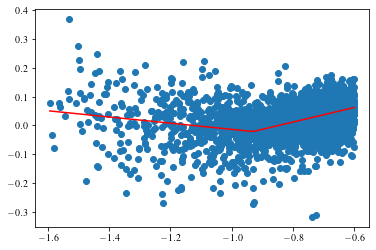

In [214]:
plt.scatter(fehs_samp_ges,mgfe_samp_ges)
plt.plot(x_ges, y_ges, color='r')

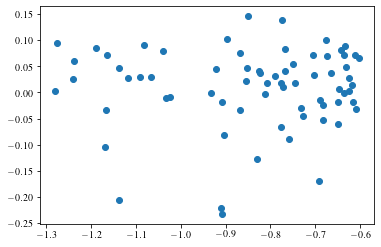

In [220]:
plt.scatter(fehs_samp_ges_sub[11],mgfe_samp_ges_sub[11])
